# Destination's Land Use Polygons analysis

This code allows you to estimate the proportion of each category of land use within the 600m buffer associated to the destination. All the polygons related to each origin are assumed to be previously estimated.  

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
import math

print ("it works")

it works


### Example for only one route 

In [2]:
route = 1128
db = gpd.read_file('../Shapes/end_LU600/R' +"%s" % (route) +'_end_LU600.shp')
print (db.crs)
db.head()

{'init': 'epsg:3116'}


,shapelen,objectid,subcategor,cod_subcat,shapearea,cod_cat_us,areagralus,objectid_1,Epub,Eqpto,Hmix,Mmix,Lmix,A_Epub,A_Eqpto,A_Hmix,A_Mmix,A_Lmix,geometry
0,254.771869,14651.0,Centralidades con predominancia econ?mica,33.0,3873.879813,3.0,?reas y corredores de alta mixtura,14651.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0000,3873.879813,0.0,0.0,"POLYGON ((835216.4070599265 1182891.752954542,..."
1,174.017491,14652.0,Centralidades con predominancia econ?mica,33.0,1988.998705,3.0,?reas y corredores de alta mixtura,14652.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0000,1988.998705,0.0,0.0,"POLYGON ((834722.350889095 1182929.19468979, 8..."
2,448.398521,14653.0,Centralidades con predominancia econ?mica,33.0,5828.957142,3.0,?reas y corredores de alta mixtura,14653.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0000,5828.957142,0.0,0.0,"POLYGON ((835510.9921392826 1182970.338791826,..."
3,295.620153,14656.0,Centralidades con predominancia econ?mica,33.0,5406.882859,3.0,?reas y corredores de alta mixtura,14656.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0000,5406.882859,0.0,0.0,"POLYGON ((835002.463215236 1182959.141382273, ..."
4,324.915375,24424.0,None,60.0,5790.709400,6.0,Uso Dotacional,24424.0,0.0,1.0,0.0,0.0,0.0,0.0,5790.7094,0.000000,0.0,0.0,"POLYGON ((834907.7012096618 1183433.975252993,..."


In [3]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 19 columns):
shapelen      174 non-null float64
objectid      174 non-null float64
subcategor    126 non-null object
cod_subcat    174 non-null float64
shapearea     174 non-null float64
cod_cat_us    174 non-null float64
areagralus    174 non-null object
objectid_1    174 non-null float64
Epub          174 non-null float64
Eqpto         174 non-null float64
Hmix          174 non-null float64
Mmix          174 non-null float64
Lmix          174 non-null float64
A_Epub        174 non-null float64
A_Eqpto       174 non-null float64
A_Hmix        174 non-null float64
A_Mmix        174 non-null float64
A_Lmix        174 non-null float64
geometry      174 non-null object
dtypes: float64(16), object(3)
memory usage: 25.9+ KB


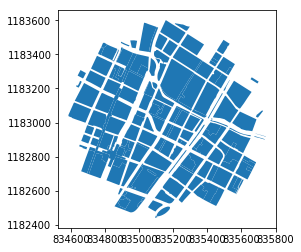

In [4]:
db.plot()

In [5]:
LU_Ep = (db['A_Epub']).sum()
LU_Eqpto = (db['A_Eqpto']).sum()
LU_Hmix = (db['A_Hmix']).sum()
LU_Mmix = (db['A_Mmix']).sum()
LU_Lmix = (db['A_Lmix']).sum()
ALU = LU_Ep + LU_Eqpto + LU_Hmix + LU_Mmix + LU_Lmix

In [6]:
print (LU_Ep)
print (LU_Eqpto)
print (LU_Hmix)
print (LU_Mmix)
print (LU_Lmix)
print (ALU)

91673.53898673
71767.16858105
486742.49460151
0.0
0.0
650183.20216929


In [7]:
pLU_Ep = LU_Ep / ALU
pLU_Eqpto = LU_Eqpto / ALU
pLU_Hmix = LU_Hmix / ALU
pLU_Mmix = LU_Mmix / ALU
pLU_Lmix = LU_Lmix / ALU

In [8]:
print (pLU_Ep) 
print (pLU_Eqpto)
print (pLU_Hmix) 
print (pLU_Mmix)
print (pLU_Lmix)

0.14099647404126675
0.11037991806248447
0.7486236078962487
0.0
0.0


In [9]:
results = pd.DataFrame ({
        "route": [str(route)],
        "pLU_Ep" : [str(pLU_Ep)],
        "pLU_Eqpto" : [str(pLU_Eqpto)],
        "pLU_Hmix" : [str(pLU_Hmix)],
        "pLU_Mmix" : [str(pLU_Mmix)],
        "pLU_Lmix" : [str(pLU_Lmix)]})
print (results)

  route               pLU_Ep            pLU_Eqpto            pLU_Hmix  \
0  1128  0.14099647404126675  0.11037991806248447  0.7486236078962487   

  pLU_Mmix pLU_Lmix  
0      0.0      0.0  


## Destination's Land Use Polygons analysis for All routes 

The code requires the list of the destination points associated to all the routes. This list is located in the Tables folder. If you move this file out of this folder, please modify the code.   

In [10]:
routes = np.loadtxt('../Tables/Routes.txt',dtype='str')

In [16]:
for i in routes:
    
    db = gpd.read_file('../Shapes/end_LU600/R' +"%s" % (i) +'_end_LU600.shp')
    LU_Ep = (db['A_Epub']).sum()
    LU_Eqpto = (db['A_Eqpto']).sum()
    LU_Hmix = (db['A_Hmix']).sum()
    LU_Mmix = (db['A_Mmix']).sum()
    LU_Lmix = (db['A_Lmix']).sum()
    ALU = LU_Ep + LU_Eqpto + LU_Hmix + LU_Mmix + LU_Lmix
    pLU_Ep = LU_Ep / ALU
    pLU_Eqpto = LU_Eqpto / ALU
    pLU_Hmix = LU_Hmix / ALU
    pLU_Mmix = LU_Mmix / ALU
    pLU_Lmix = LU_Lmix / ALU
    results = pd.DataFrame ({
        "route": [str(i)],
        "pLU_Ep" : [str(pLU_Ep)],
        "pLU_Eqpto" : [str(pLU_Eqpto)],
        "pLU_Hmix" : [str(pLU_Hmix)],
        "pLU_Mmix" : [str(pLU_Mmix)],
        "pLU_Lmix" : [str(pLU_Lmix)],
        "D_entropy": [O_entropy]})
    results.to_csv('../Tables/OUT/R' +"%s" %(i)+'_end_LU600_index.txt',index=False, header=True)

This part of the code summarizes the Origin's arcs infrastructure in only one table. Please copy it to a text file and save. 

In [18]:
print ('route,D_pLU_Ep,D_pLU_Eqpto,D_pLU_Hmix,D_pLU_Mmix,D_pLU_Lmix')
for i in routes:
    df=np.loadtxt('../datos/tables/OUT/end_LU600_index/R' +"%s" %(i)+'_end_LU600_index.txt', delimiter=',',skiprows=1)
    print ((str(i)),(df[1]),(df[2]),(df[3]),(df[4]),(df[5]))

ruta,D_pLU_Ep,D_pLU_Eqpto,D_pLU_Hmix,D_pLU_Mmix,D_pLU_Lmix,D_entropy
('1002', 0.203942674001, 0.291537217869, 0.12909209409700001, 0.36188135481299999, 0.0135466592196, 0.85370230092400001)
('1006', 0.18718614496399999, 0.077280278566199997, 0.73553357646999995, 0.0, 0.0, 0.67125280630600004)
('1009', 0.17399415940900001, 0.024731498770399998, 0.74884349794500005, 0.036851852937200003, 0.015578990938199999, 0.49634223698399998)
('10291', 0.13792062754500001, 0.076318443430300004, 0.78576092902500005, 0.0, 0.0, 0.59988009383499996)
('10292', 0.163217717106, 0.14226084882000001, 0.35061732521799999, 0.24884635369700001, 0.095057755159299998, 0.93857093018399995)
('1050', 0.15984634348999999, 0.067199849601499995, 0.109437185169, 0.045291269438900002, 0.61822535229999998, 0.71709245731299998)
('1052', 0.098150941531600006, 0.12865478841200001, 0.77319427005600005, 0.0, 0.0, 0.62855660456899998)
('1079', 0.064810759230299997, 0.074299926887599996, 0.155779725698, 0.21043590854999999, 0.494